### Airbnb Data viz

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


%matplotlib inline

In [11]:
data = pd.read_csv('datasets.csv',encoding_errors='ignore')


In [12]:
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,rating,bedrooms,beds,baths
0,1.312228e+06,Rental unit in Brooklyn · ★5.0 · 1 bedroom,7130382,Walter,Brooklyn,Clinton Hill,40.683710,-73.964610,Private room,55.0,...,20/12/15,0.03,1.0,0.0,0.0,No License,5,1,1,Not specified
1,4.527754e+07,Rental unit in New York · ★4.67 · 2 bedrooms ·...,51501835,Jeniffer,Manhattan,Hell's Kitchen,40.766610,-73.988100,Entire home/apt,144.0,...,01/05/23,0.24,139.0,364.0,2.0,No License,4.67,2,1,1
2,9.710000e+17,Rental unit in New York · ★4.17 · 1 bedroom · ...,528871354,Joshua,Manhattan,Chelsea,40.750764,-73.994605,Entire home/apt,187.0,...,18/12/23,1.67,1.0,343.0,6.0,Exempt,4.17,1,2,1
3,3.857863e+06,Rental unit in New York · ★4.64 · 1 bedroom · ...,19902271,John And Catherine,Manhattan,Washington Heights,40.835600,-73.942500,Private room,120.0,...,17/09/23,1.38,2.0,363.0,12.0,No License,4.64,1,1,1
4,4.089661e+07,Condo in New York · ★4.91 · Studio · 1 bed · 1...,61391963,Stay With Vibe,Manhattan,Murray Hill,40.751120,-73.978600,Entire home/apt,85.0,...,03/12/23,0.24,133.0,335.0,3.0,No License,4.91,Studio,1,1


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20770 entries, 0 to 20769
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20770 non-null  float64
 1   name                            20770 non-null  object 
 2   host_id                         20770 non-null  int64  
 3   host_name                       20770 non-null  object 
 4   neighbourhood_group             20770 non-null  object 
 5   neighbourhood                   20763 non-null  object 
 6   latitude                        20763 non-null  float64
 7   longitude                       20763 non-null  float64
 8   room_type                       20763 non-null  object 
 9   price                           20736 non-null  float64
 10  minimum_nights                  20763 non-null  float64
 11  number_of_reviews               20763 non-null  float64
 12  last_review                     

In [15]:
data.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,beds
count,2.077000e+04,2.077000e+04,20763.000000,20763.000000,20736.000000,20763.000000,20763.000000,20763.000000,20763.000000,20763.000000,20763.000000,20770.000000
mean,3.033858e+17,1.749049e+08,40.726821,-73.939179,187.714940,28.558493,42.610605,1.257589,18.866686,206.067957,10.848962,1.723592
std,3.901221e+17,1.725657e+08,0.060293,0.061403,1023.245124,33.532697,73.523401,1.904472,70.921443,135.077259,21.354876,1.211993
min,2.595000e+03,1.678000e+03,40.500314,-74.249840,10.000000,1.000000,1.000000,0.010000,1.000000,0.000000,0.000000,1.000000
25%,2.707260e+07,2.041184e+07,40.684159,-73.980755,80.000000,30.000000,4.000000,0.210000,1.000000,87.000000,1.000000,1.000000
50%,4.992852e+07,1.086990e+08,40.722890,-73.949597,125.000000,30.000000,14.000000,0.650000,2.000000,215.000000,3.000000,1.000000
75%,7.220000e+17,3.143997e+08,40.763106,-73.917475,199.000000,30.000000,49.000000,1.800000,5.000000,353.000000,15.000000,2.000000
max,1.050000e+18,5.504035e+08,40.911147,-73.713650,100000.000000,1250.000000,1865.000000,75.490000,713.000000,365.000000,1075.000000,42.000000


In [ ]:
data.isnull().sum()
# Drop All nulls Values
data.dropna(inplace=True)


id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
license                           0
rating                            0
bedrooms                          0
beds                              0
baths                             0
dtype: int64

In [22]:
# duplicate Rows
data.duplicated().sum() 

# delete duplicated Records
data.drop_duplicates(inplace=True)
data.duplicated().sum() 

0

In [25]:
data.dtypes
data['id']=data['id'].astype(object)
data.dtypes
data['host_id']=data['host_id'].astype(object)
data.dtypes

id                                 object
name                               object
host_id                            object
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                             float64
minimum_nights                    float64
number_of_reviews                 float64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count    float64
availability_365                  float64
number_of_reviews_ltm             float64
license                            object
rating                             object
bedrooms                           object
beds                                int64
baths                              object
dtype: object

<Axes: xlabel='price'>

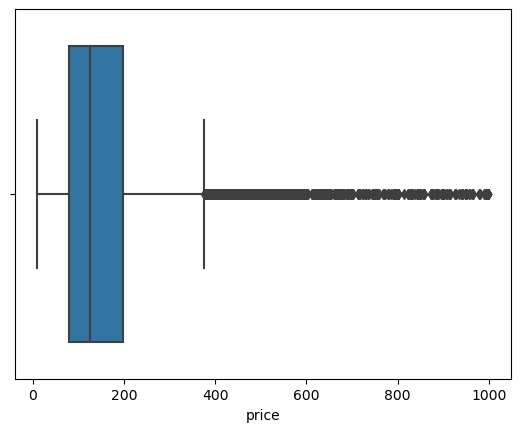

In [52]:
# idenfying outliers in price

df = data[data['price'] < 1000]

sns.boxplot(data=df, x='price')

c:\Users\alaah\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



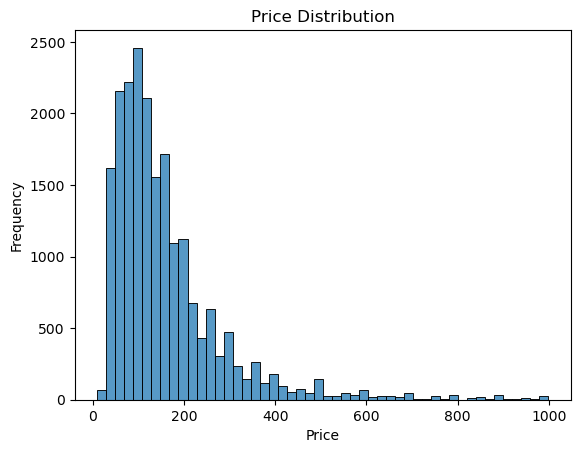

In [106]:
#Price distribuion

sns.histplot(df['price'], bins=50)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

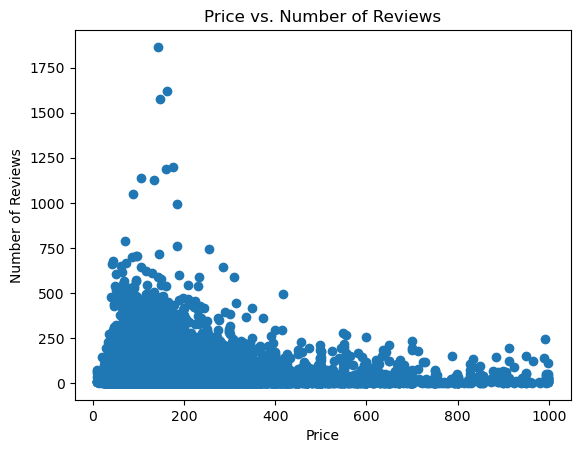

In [107]:
plt.scatter(df['price'], df['number_of_reviews'])
plt.title('Price vs. Number of Reviews')
plt.xlabel('Price')
plt.ylabel('Number of Reviews')
plt.show()


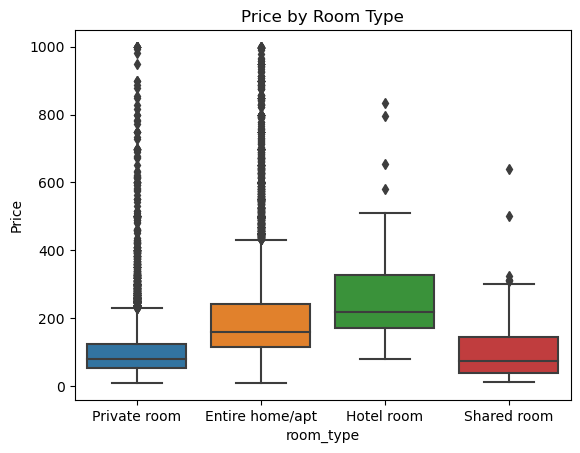

In [108]:
sns.boxplot(data=df, x='room_type', y='price')
plt.title('Price by Room Type')
plt.ylabel('Price')
plt.show()



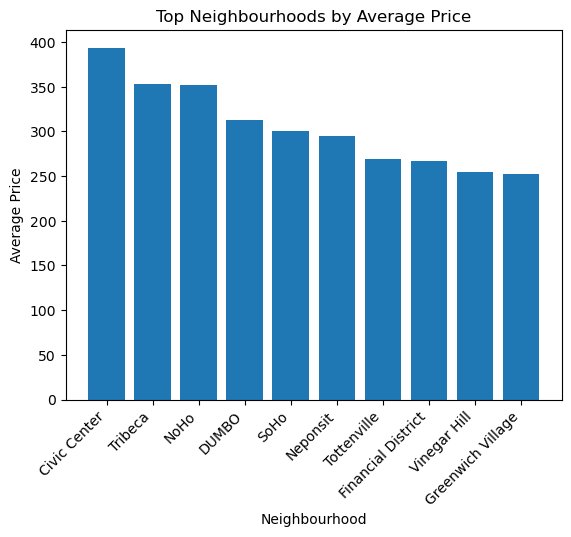

In [109]:
top_neighbourhoods = neighbourhood_price.sort_values(by='price', ascending=False).head(10)
# Create the bar plot
plt.bar(top_neighbourhoods['neighbourhood'], top_neighbourhoods['price'])
plt.title('Top Neighbourhoods by Average Price')
plt.xlabel('Neighbourhood')
plt.ylabel('Average Price')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()



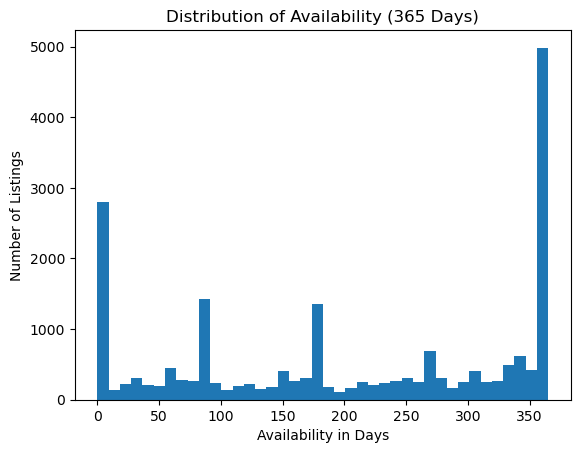

In [110]:
plt.hist(df['availability_365'], bins=40)
plt.title('Distribution of Availability (365 Days)')
plt.xlabel('Availability in Days')
plt.ylabel('Number of Listings')
plt.show()


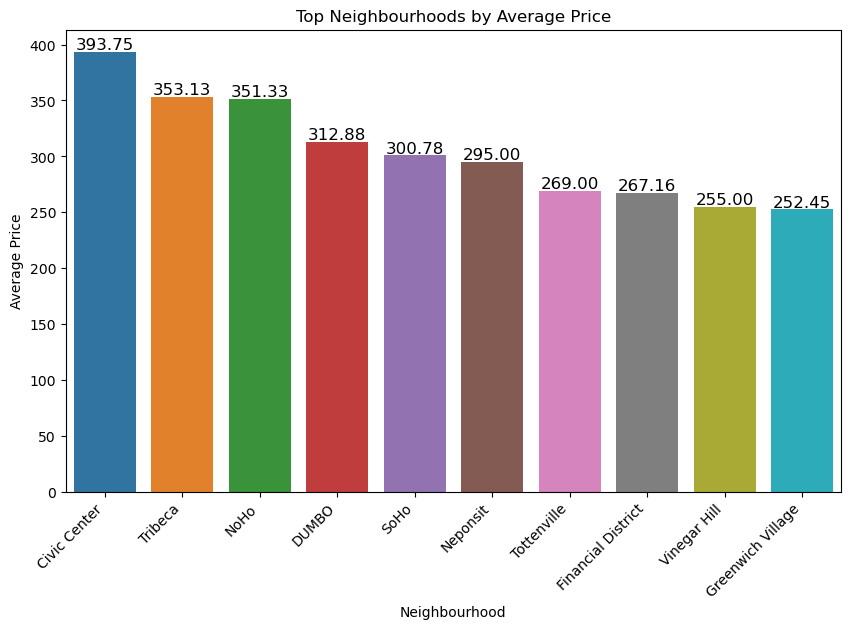

In [115]:
top_10_neighbourhoods = neighbourhood_price.sort_values(by='price', ascending=False).head(10)

# Create the bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=top_10_neighbourhoods, x='neighbourhood', y='price')

# Add text labels on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

# Add titles and labels
plt.title('Top Neighbourhoods by Average Price')
plt.xlabel('Neighbourhood')
plt.ylabel('Average Price')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()




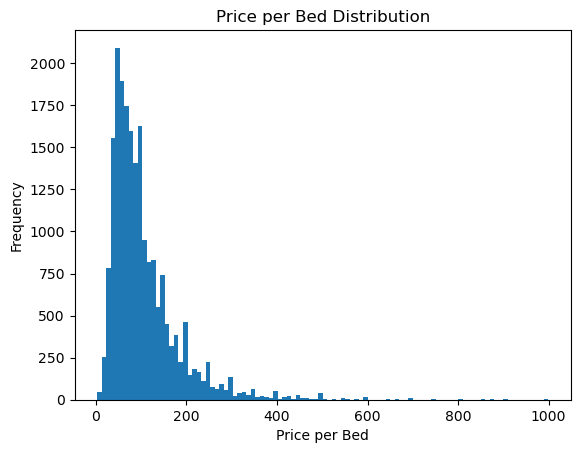

In [117]:
plt.hist(df['price_per_bed'], bins=100)
plt.title('Price per Bed Distribution')
plt.xlabel('Price per Bed')
plt.ylabel('Frequency')
plt.show()



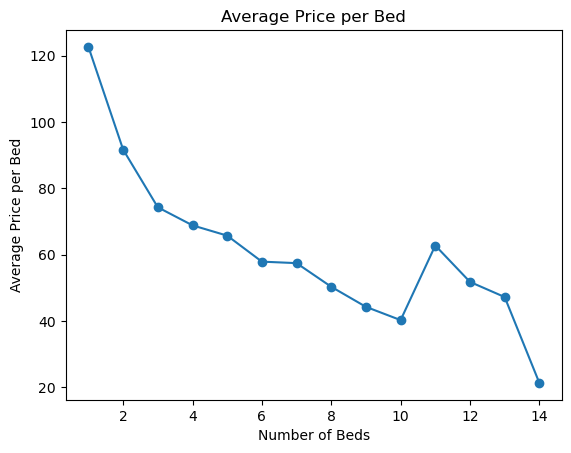

In [120]:
avg_price_per_bed = df.groupby('beds')['price_per_bed'].mean().reset_index()

plt.plot(avg_price_per_bed['beds'], avg_price_per_bed['price_per_bed'], marker='o')

# Add titles and labels
plt.title('Average Price per Bed')
plt.xlabel('Number of Beds')
plt.ylabel('Average Price per Bed')

# Show the plot
plt.show()



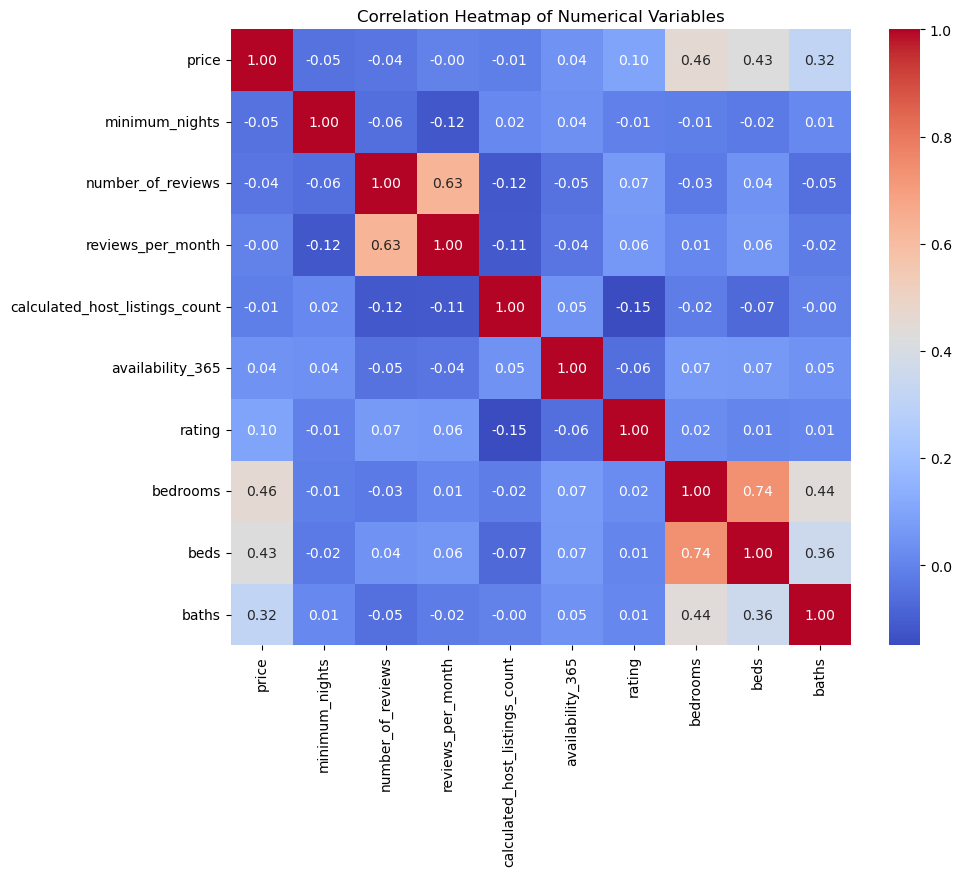

In [121]:
# Convert non-numeric values in 'rating' to NaN
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df['minimum_nights'] = pd.to_numeric(df['minimum_nights'], errors='coerce')
df['number_of_reviews'] = pd.to_numeric(df['number_of_reviews'], errors='coerce')
df['reviews_per_month'] = pd.to_numeric(df['reviews_per_month'], errors='coerce')
df['calculated_host_listings_count'] = pd.to_numeric(df['calculated_host_listings_count'], errors='coerce')
df['availability_365'] = pd.to_numeric(df['availability_365'], errors='coerce')
df['bedrooms'] = pd.to_numeric(df['bedrooms'], errors='coerce')
df['beds'] = pd.to_numeric(df['beds'], errors='coerce')
df['baths'] = pd.to_numeric(df['baths'], errors='coerce')

# Specify numerical columns to calculate the correlation matrix
numerical_columns = ['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 
                     'calculated_host_listings_count', 'availability_365', 'rating', 'bedrooms', 'beds', 'baths']

# Calculate the correlation matrix
corr_matrix = df[numerical_columns].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title("Correlation Heatmap of Numerical Variables")
plt.show()


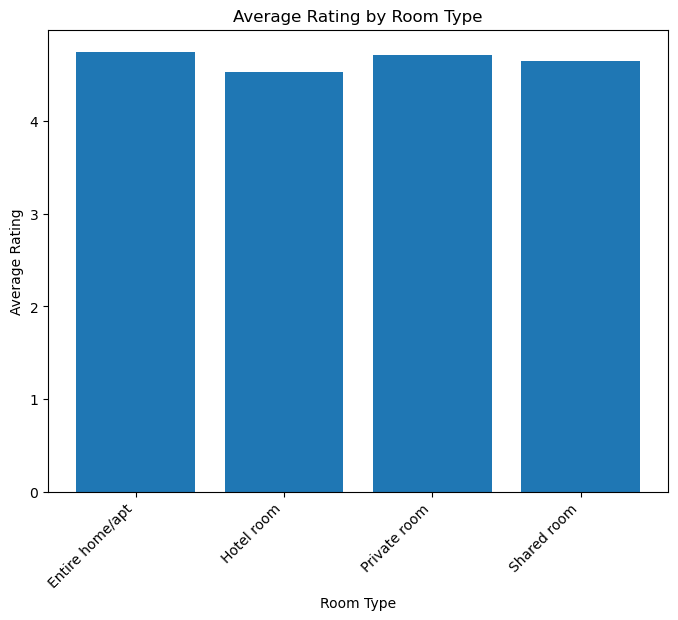

In [122]:
room_type_avg_rating = df.groupby('room_type')['rating'].mean().reset_index()

# Create the bar plot
plt.figure(figsize=(8, 6))
plt.bar(room_type_avg_rating['room_type'], room_type_avg_rating['rating'])

# Add titles and labels
plt.title('Average Rating by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Average Rating')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()



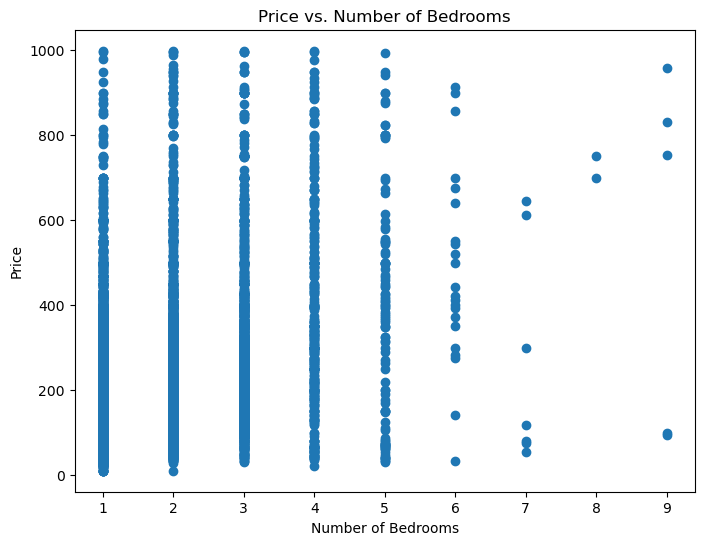

In [123]:
plt.figure(figsize=(8, 6))
plt.scatter(df['bedrooms'], df['price'])

# Add titles and labels
plt.title('Price vs. Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')

# Show the plot
plt.show()



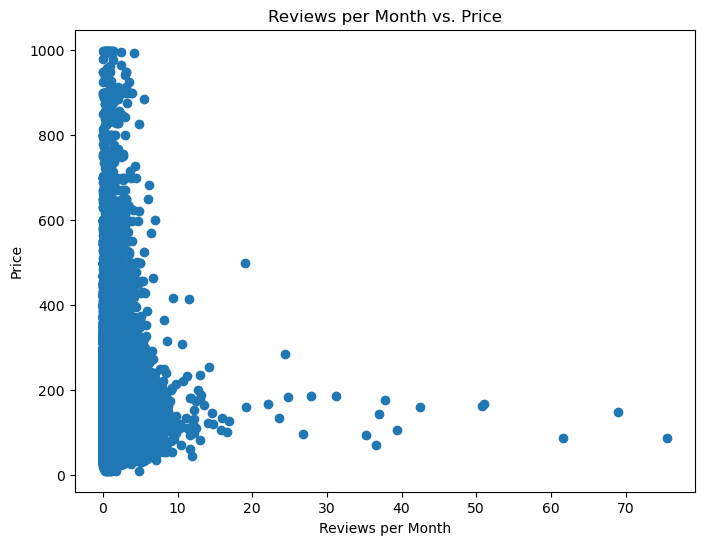

In [124]:
plt.figure(figsize=(8, 6))
plt.scatter(df['reviews_per_month'], df['price'])

# Add titles and labels
plt.title('Reviews per Month vs. Price')
plt.xlabel('Reviews per Month')
plt.ylabel('Price')

# Show the plot
plt.show()


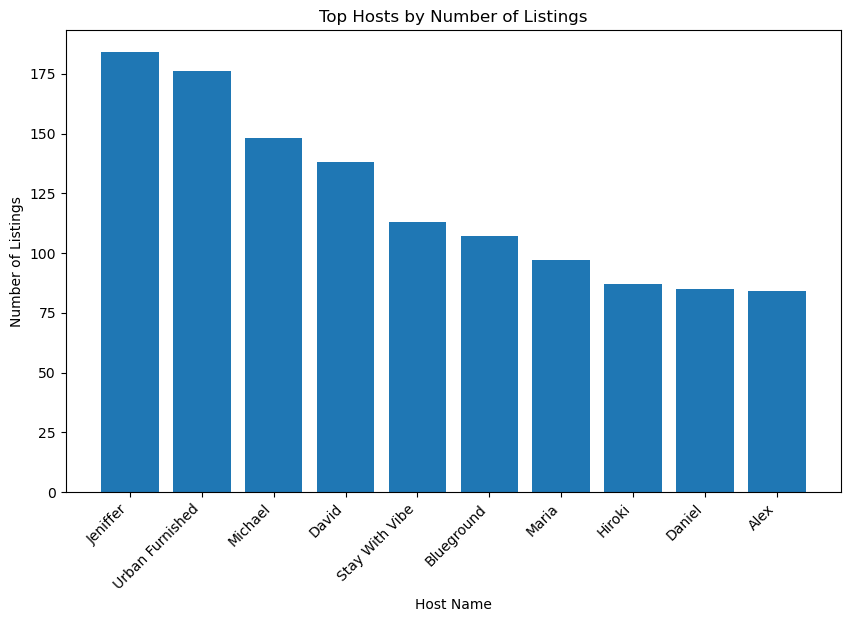

In [125]:
top_hosts = df.groupby('host_name')['id'].count().reset_index().sort_values(by='id', ascending=False).head(10)

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(top_hosts['host_name'], top_hosts['id'])

# Add titles and labels
plt.title('Top Hosts by Number of Listings')
plt.xlabel('Host Name')
plt.ylabel('Number of Listings')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()



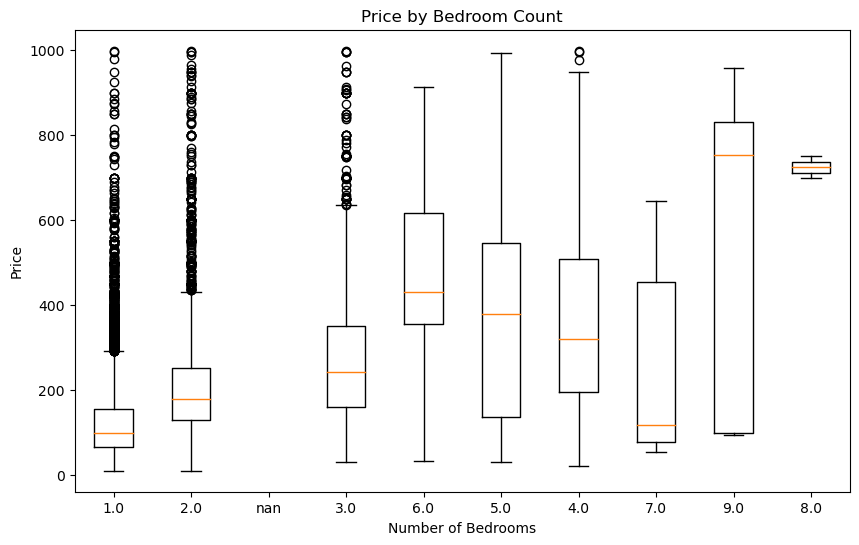

In [126]:
plt.figure(figsize=(10, 6))
plt.boxplot([df[df['bedrooms'] == bedroom]['price'] for bedroom in df['bedrooms'].unique()],
            labels=df['bedrooms'].unique())

# Add titles and labels
plt.title('Price by Bedroom Count')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')

# Show the plot
plt.show()



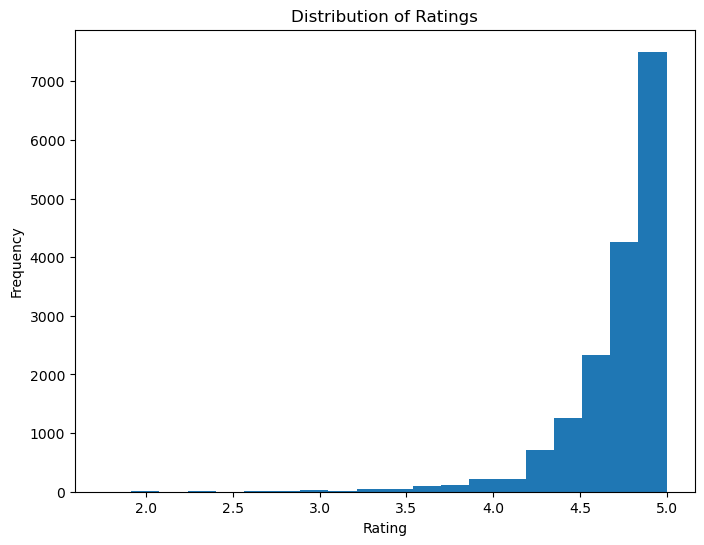

In [127]:
plt.figure(figsize=(8, 6))
plt.hist(df['rating'], bins=20)

# Add titles and labels
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')

# Show the plot
plt.show()


Mean Squared Error: 12526.285069888301
R-squared: 0.21071678077652123


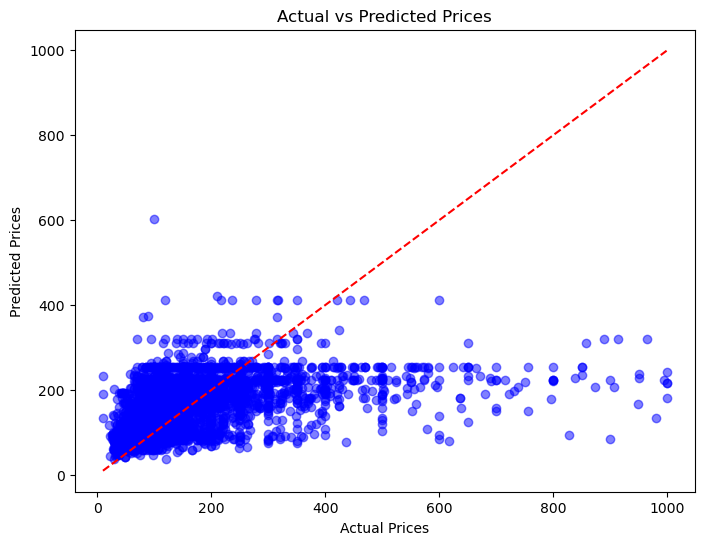

c:\Users\alaah\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning:

unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.



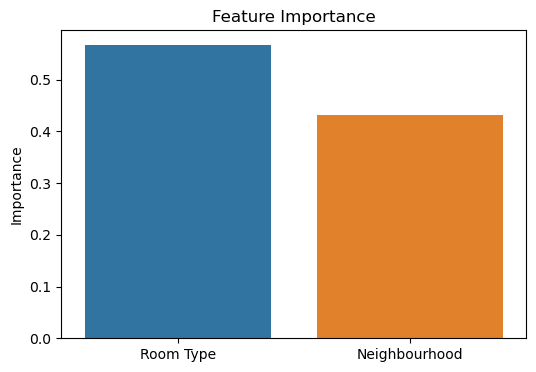

In [102]:
# Drop rows with missing values in key columns
df = df.dropna(subset=['price', 'room_type', 'neighbourhood'])

# Convert categorical variables to numerical ones (Label Encoding or One-Hot Encoding)
# Label Encoding for Room Type and Neighbourhood
label_encoder = LabelEncoder()
df['room_type_encoded'] = label_encoder.fit_transform(df['room_type'])
df['neighbourhood_encoded'] = label_encoder.fit_transform(df['neighbourhood'])

# Select the features and target
X = df[['room_type_encoded', 'neighbourhood_encoded']]
y = df['price']
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Initialize and train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict the prices on the test set
y_pred = model.predict(X_test)
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')
# Plot actual vs predicted prices
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()

# Get feature importances
feature_importance = model.feature_importances_

# Plot feature importance
plt.figure(figsize=(6, 4))
sns.barplot(x=['Room Type', 'Neighbourhood'], y=feature_importance)
plt.title('Feature Importance')
plt.ylabel('Importance')
plt.show()

